<a href="https://colab.research.google.com/github/VARITHSA/Prodigy-Infotech/blob/main/prodigy_ml_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [30]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [31]:
x_train =train_df[['GrLivArea','TotalBsmtSF','BedroomAbvGr','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath']]
y_train = train_df['SalePrice']
x_test = test_df[['GrLivArea','TotalBsmtSF','BedroomAbvGr','FullBath','BsmtFullBath','HalfBath','BsmtHalfBath']]

x_train = x_train.fillna(0)
x_test = x_test.fillna(0)



In [32]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_test_pred = model.predict(x_test)

In [33]:
y_train_predict = model.predict(x_train)
meanSquaredError = mean_squared_error(y_train,y_train_predict)
r2 = model.score(x_train,y_train)
print(f'Mean Squared Error:{meanSquaredError}')
print(f'R2 Score:{r2}')


Mean Squared Error:2044603502.7180765
R2 Score:0.6758090944307693


In [34]:
test_df['SalePrice'] = y_test_pred
test_df[['Id','SalePrice']].to_csv('submission.csv',index=False)

In [35]:
print(test_df['SalePrice'])

0       109438.545617
1       165746.440192
2       197160.396456
3       195262.786870
4       191308.117437
            ...      
1454    105248.627344
1455    105248.627344
1456    132538.154274
1457    108521.051260
1458    227452.911514
Name: SalePrice, Length: 1459, dtype: float64


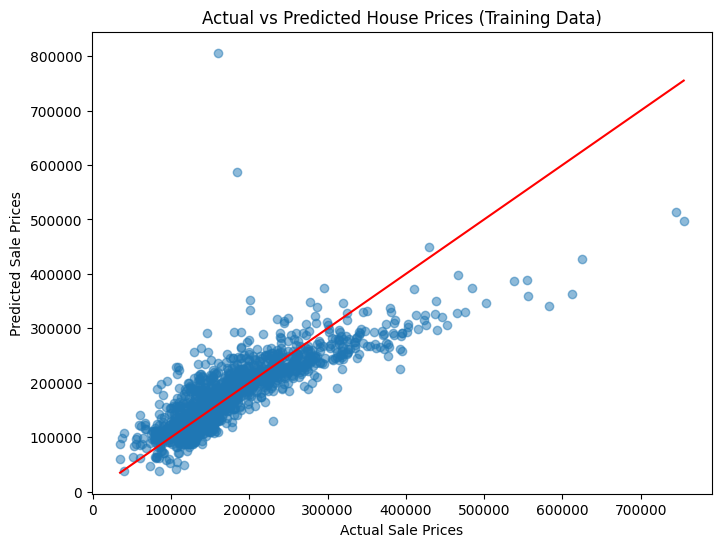

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_predict, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Ideal line for perfect prediction
plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual vs Predicted House Prices (Training Data)")
plt.show()
